
# Одномерная оптимизация

### №1 Запрограммировать оптимизацию унимодальной функции **методом Ньютона**:

1. $f(x) = x^2 - x + e^{-x}$ на всей числовой оси.

### Цель: Найти минимум функции

Для нахождения минимума используется **метод Ньютона** (коррекция значения $x$ выполняется на основе вычисления производных):

- Первая производная функции: $f'(x) = 2x - 1 - e^{-x}$
- Вторая производная функции: $f''(x) = 2 + e^{-x}$

### Критерий остановки:

Минимизация функции считается завершённой, если выполняется условие:

$$
\left| f'(x_n) \right| \leq 10^{-4}
$$

### Шаги алгоритма:

1. Необходимо выбрать начальную точку $x_0$ (например, $x_0 = 0.5$).
2. На каждой итерации вычисляется новое приближение $x_{n+1}$ по формуле:
   $$
   x_{n+1} = x_n - \frac{f'(x_n)}{f''(x_n)}
   $$
3. Далее, проверяется выполнение условия $\left| f'(x_n) \right| \leq 10^{-4}$. Если условие выполнено, итерации прекращаются.
4. Отслеживается количество итераций и значение $x_n$, при котором функция достигает минимального значения.


Минимум функции достигается при x = 0.7388056959611448
Значение функции в точке минимума: f(0.7388056959611448) = 0.28471223542493584
Количество итераций: 2


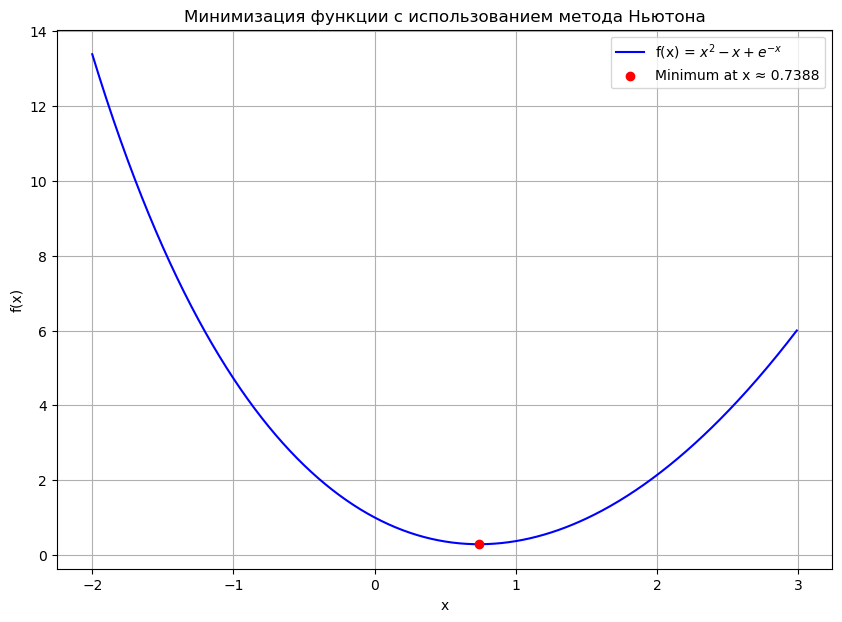

In [21]:
from math import exp  
import matplotlib.pyplot as plt

# Определение функции
def f(x):
    return x**2 - x + exp(-x) 

# Первая производная
def f_prime(x):
    return 2*x - 1 - exp(-x)  

# Вторая производная
def f_double_prime(x):
    return 2 + exp(-x)  # Производная: 2 + exp(-x)

# Метод Ньютона для минимизации с отслеживанием итераций
def newtons_method_with_iterations(x0, tolerance=0.0001, max_iterations=100):
    x_n = x0  # Начальное значение
    iterations = 0
    for _ in range(max_iterations):
        f_prime_value = f_prime(x_n)
        if abs(f_prime_value) <= tolerance:
            break
        x_n = x_n - f_prime_value / f_double_prime(x_n)  # Шаг метода Ньютона
        iterations += 1
    return x_n, iterations

# Точка начала поиска 
initial_guess = 0.35

# Выполняем метод Ньютона и проверяем количество итераций
minimum, iterations_count = newtons_method_with_iterations(initial_guess)

# Вывод
print(f"Минимум функции достигается при x = {minimum}")
print(f"Значение функции в точке минимума: f({minimum}) = {f(minimum)}")
print(f"Количество итераций: {iterations_count}")

# График
x_values = [x / 100.0 for x in range(-200, 300)]  
y_values = [f(x) for x in x_values]

plt.figure(figsize=(10, 7))
plt.plot(x_values, y_values, label="f(x) = $x^2 - x + e^{-x}$", color="blue")
plt.scatter(minimum, f(minimum), color="red", label=f"Minimum at x ≈ {minimum:.4f}", zorder=5)

# Настройки графика
plt.title("Минимизация функции с использованием метода Ньютона")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

# Многомерная оптимизация (безусловная)

## Аннотация

В данной работе решается задача минимизации функций с использованием **модифицированного метода Ньютона с регулировкой шага** и **метода золотого сечения** для одномерной минимизации шага \( \alpha \). Основная цель — нахождение точки минимума функций \( A \) и \( B \), обеспечивая устойчивость и точность нахождения оптимального значения.

## Метод Ньютона с регулировкой шага

### Основная идея метода
Метод Ньютона предполагает использование второй производной функции (матрицы Гессе) для учета кривизны, что позволяет выбирать направление, ведущее к более быстрой сходимости к минимуму. В модифицированном методе шаг \( \alpha \) подбирается с использованием одномерной минимизации, чтобы избежать больших скачков и гарантировать устойчивость.

### Шаги алгоритма
1. **Начальная точка**: Задаем начальное приближение $ x^0 $.
2. **Определение направления** $ p_k $ на каждой итерации $ k $:
   $$
   p_k = -\left[f''(x^k)\right]^{-1} f'(x^k)
   $$
   где $ f''(x^k) $ — матрица Гессе, $ f'(x^k) $ — градиент функции.
3. **Оптимальный шаг** $ \alpha_k $ определяется с помощью одномерной минимизации:
   $$
   \alpha_k = \arg \min_{\alpha > 0} f\left(x^k + \alpha p_k\right)
   $$
4. **Обновление текущей точки**:
   $$
   x^{k+1} = x^k + \alpha_k p_k
   $$
5. **Проверка условия остановки**: если изменение координат становится меньше заданного порога $ \epsilon $, алгоритм останавливается.

### Пример функции $ A $
$$
f_A(x, y) = (x + 1)^2 + 2(y - 1)^2
$$

- **Градиент**:
  $$
  \nabla f_A(x, y) = \begin{bmatrix} 2(x + 1) \\ 4(y - 1) \end{bmatrix}
  $$

- **Матрица Гессе**:
  $$
  H_A(x, y) = \begin{bmatrix} 2 & 0 \\ 0 & 4 \end{bmatrix}
  $$

### Пример функции $ B $
$$
f_B(x, y) = (x - y^2)^2 + y^4
$$

- **Градиент**:
  $$
  \nabla f_B(x, y) = \begin{bmatrix} 2(x - y^2) \\ -4y(x - y^2) + 4y^3 \end{bmatrix}
  $$

- **Матрица Гессе**:
  $$
  H_B(x, y) = \begin{bmatrix} 2 & -4y \\ -4y & -4x + 24y^2 \end{bmatrix}
  $$

## Метод золотого сечения

### Основная идея метода
Метод золотого сечения применяется для одномерной минимизации функции на заданном интервале. Использование пропорции золотого сечения позволяет уменьшить количество вычислений значений функции, так как на каждой итерации вычисляется значение функции только в одной новой точке.

### Шаги алгоритма
1. Задаем начальный интервал $ [a, b] $ и выбираем две точки $ c_1 $ и $ d_1 $ по пропорции золотого сечения:
   $$
   c_1 = a + \frac{3 - \sqrt{5}}{2} (b - a), \quad d_1 = a + \frac{\sqrt{5} - 1}{2} (b - a)
   $$
2. Вычисляем значения функции в точках $ f(c_1) $ и $ f(d_1) $.
3. Если $ f(c_1) > f(d_1) $, то сдвигаем левую границу интервала, обновляя $ a = c_1 $, и определяем новую точку $ c_2 $.
   
   Если $ f(c_1) < f(d_1) $, то сдвигаем правую границу интервала, обновляя $ b = d_1 $, и определяем новую точку $ d_2 $.
4. Повторяем шаги 1-3 до тех пор, пока длина интервала не станет меньше заданной точности $ \epsilon $.

### Пример использования метода золотого сечения для функций $ A $ и $ B $

При применении модифицированного метода Ньютона, метод золотого сечения используется для нахождения оптимального шага $ \alpha $ в обновлении:
$$
x^{k+1} = x^k + \alpha_k p_k
$$
где
$$
\alpha_k = \arg \min_{\alpha > 0} f\left(x^k + \alpha p_k\right)
$$

- **Для функции $ A $**: Оптимальный шаг $ \alpha $ подбирается, минимизируя функцию вдоль направления спуска, чтобы достичь наименьшего значения для $ f_A $.
- **Для функции $ B $**: Оптимальный шаг $ \alpha $ также подбирается вдоль направления спуска $ p_k $ для минимизации значения $ f_B $ в точке $ x^k + \alpha p_k $.

Метод золотого сечения обеспечивает эффективный и точный выбор $ \alpha $ при каждом шаге, что гарантирует устойчивую сходимость к минимуму.


Сошлось за 2 итераций.
Минимум функции A: [-1.  1.]
Значение функции в минимуме: 1.6225180106226185e-21


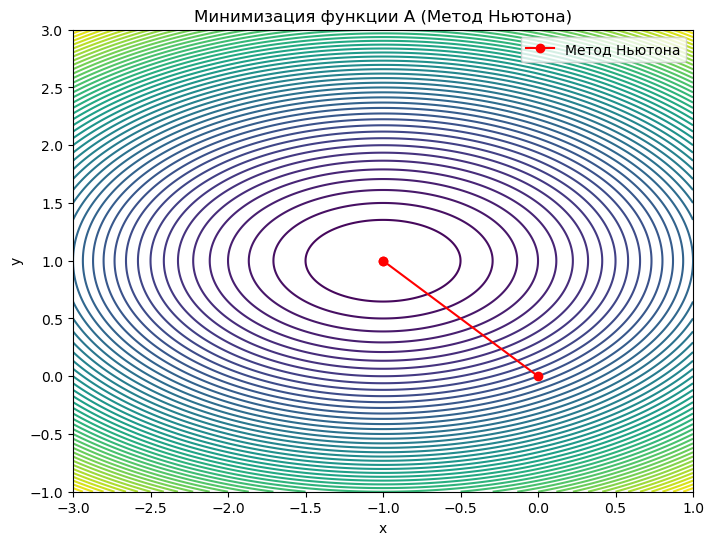

Сошлось за 6 итераций.
Минимум функции B: [ 2.65572139e-09 -6.62762042e-04]
Значение функции в минимуме: 3.835613007206628e-13


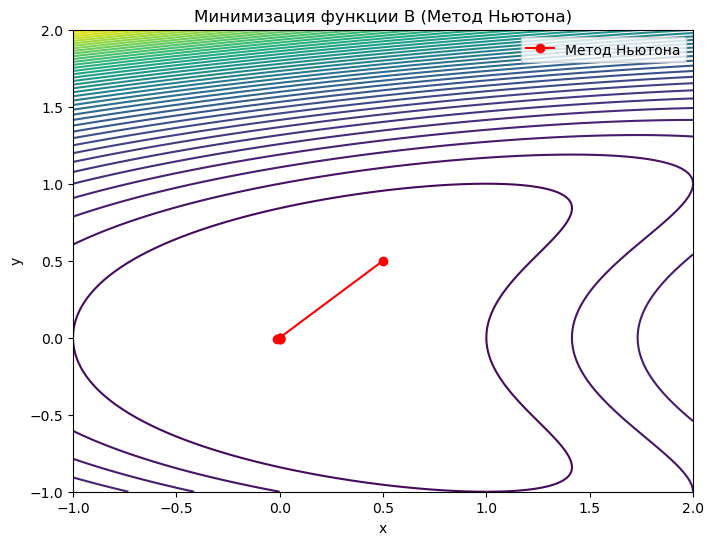

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Определение функции A, ее градиента и гессиана
def f_A(x):
    """Вычисление значения функции A в точке x."""
     # x — это numpy массив с двумя элементами: x[0] = x, x[1] = y
    
    return (x[0] + 1)**2 + 2 * (x[1] - 1)**2

def grad_f_A(x):
    """Вычисление градиента функции A в точке x."""
    return np.array([2 * (x[0] + 1), 4 * (x[1] - 1)])

def hessian_f_A(x):
    """Вычисление матрицы Гессе функции A в точке x."""
    return np.array([[2, 0], [0, 4]])

# Определение функции B, ее градиента и гессиана
def f_B(x):
    """Вычисление значения функции B в точке x."""
    return (x[0] - x[1]**2)**2 + x[1]**4

def grad_f_B(x):
    """Вычисление градиента функции B в точке x."""
     # x — это numpy массив с двумя элементами: x[0] = x, x[1] = y
    return np.array([2 * (x[0] - x[1]**2), -4 * x[1] * (x[0] - x[1]**2) + 4 * x[1]**3])

def hessian_f_B(x):
    """Вычисление матрицы Гессе функции B в точке x."""
    return np.array([[2, -4 * x[1]], [-4 * x[1], -4 * (x[0] - x[1]**2) + 12 * x[1]**2]])

# Метод золотого сечения для поиска оптимального шага
def golden_section_search(f, a, b, tol=1e-5):
    """Метод золотого сечения для поиска минимума функции f на отрезке [a, b]."""
    phi = (1 + np.sqrt(5)) / 2  # Золотое сечение
    resphi = 2 - phi

    # Начальное вычисление двух точек на отрезке
    x1 = a + resphi * (b - a)
    x2 = b - resphi * (b - a)
    f1 = f(x1)
    f2 = f(x2)

    # Повторяем, пока длина интервала [a, b] не станет меньше заданного допуска
    while abs(b - a) > tol:
        if f1 < f2:  # Сравниваем значения функции в точках x1 и x2
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + resphi * (b - a)
            f1 = f(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = b - resphi * (b - a)
            f2 = f(x2)

    # Возвращаем середину финального интервала как точку минимума
    return (a + b) / 2

# Метод Ньютона с использованием золотого сечения для поиска оптимального шага
def newtons_method(f, grad_f, hessian_f, x0, tol=1e-6, max_iter=100):
    """
    Метод Ньютона с поиском шага методом золотого сечения.

    Параметры:
    - f: функция для минимизации
    - grad_f: градиент функции
    - hessian_f: гессиан функции
    - x0: начальная точка (numpy array)
    - tol: точность
    - max_iter: максимальное число итераций

    Возвращает:
    - x: точка минимума
    - path: список точек траектории
    """
    x = np.array(x0, dtype=float)
    path = [x.copy()]

    for i in range(max_iter):
        grad = grad_f(x)
        grad_norm = np.linalg.norm(grad)
        if grad_norm < tol:  # Проверяем условие сходимости по норме градиента
            print(f"Сошлось за {i} итераций.")
            break

        H = hessian_f(x)
        try:
            delta_x = -np.linalg.solve(H, grad)
        except np.linalg.LinAlgError:
            # В случае ошибки запишем матрицу
            H += np.eye(len(x)) * 1e-5
            delta_x = -np.linalg.solve(H, grad)

        # Определяем функцию одной переменной для поиска шага
        def phi(alpha):
            return f(x + alpha * delta_x)

        # Поиск оптимального шага методом золотого сечения на интервале [0, 1]
        alpha = golden_section_search(phi, 0, 1)

        # Обновляем точку
        x = x + alpha * delta_x
        path.append(x.copy())  # Добавляем текущую точку в траекторию

    return x, path

# Применение метода Ньютона к функции A
x0_A = [0.0, 0.0]  # Начальная точка для функции A
min_x_A, path_A = newtons_method(f_A, grad_f_A, hessian_f_A, x0_A)
print(f"Минимум функции A: {min_x_A}")
print(f"Значение функции в минимуме: {f_A(min_x_A)}")

# Построение графика для функции A
x_vals = np.linspace(-3, 1, 400)
y_vals = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f_A(np.array([X, Y]))

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=50)
path_A = np.array(path_A)
plt.plot(path_A[:, 0], path_A[:, 1], 'ro-', label='Метод Ньютона')
plt.title('Минимизация функции A (Метод Ньютона)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Применение метода Ньютона к функции B
x0_B = [0.5, 0.5]  # Начальная точка для функции B
min_x_B, path_B = newtons_method(f_B, grad_f_B, hessian_f_B, x0_B)
print(f"Минимум функции B: {min_x_B}")
print(f"Значение функции в минимуме: {f_B(min_x_B)}")

# Построение графика для функции B
x_vals = np.linspace(-1, 2, 400)
y_vals = np.linspace(-1, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f_B(np.array([X, Y]))

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=50)
path_B = np.array(path_B)
plt.plot(path_B[:, 0], path_B[:, 1], 'ro-', label='Метод Ньютона')
plt.title('Минимизация функции B (Метод Ньютона)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
